In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 2**12 # 4096 pt FFT 
fs = 2**15 # 32768Hz sampling

# Create 1s worth of x samples
x = np.linspace(0.0, 1.0, fs)
x.shape

(32768,)

In [4]:
yt = np.sin(2 * np.pi * 180 * x)# + np.sin(2 * np.pi * 110 * x)
yt.shape

(32768,)

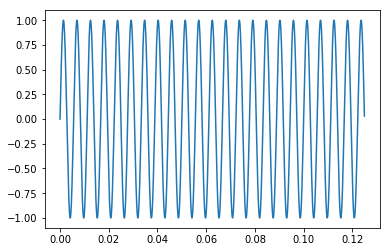

In [5]:
plt.plot(x[:N], yt[:N])

In [6]:
sp = np.fft.fft(yt[:N])
sp

array([57.94091288+0.j        , 58.05559069+0.00556691j,
       58.4023639 +0.01120032j, ..., 58.98961709-0.01696939j,
       58.4023639 -0.01120032j, 58.05559069-0.00556691j])

In [7]:
bins_to_shift = 4

In [8]:
mag = np.absolute(sp)
phase = np.angle(sp)
mag_new = np.zeros(N)
mag_new[0] = mag[0]
mag_new[1:(N//2) + 1] = np.roll(mag[1:(N//2) + 1], bins_to_shift)
mag_new[(N//2)+1:] = np.roll(mag[(N//2)-1:0:-1], -bins_to_shift)

phase_new = np.zeros(N)
phase_new[0] = phase[0]
phase_new[1:N//2 + 1] = np.roll(phase[1:(N//2) + 1], bins_to_shift)
phase_new[(N//2) + 1:] = np.roll(-phase[(N//2)-1:0:-1], -bins_to_shift)

sp_new = mag_new * np.exp(1j*phase_new)
sp_new

array([ 5.79409129e+01+0.00000000e+00j, -1.51023155e-02-4.96518758e-06j,
       -1.51022647e-02-3.31012184e-06j, ...,
       -1.51022647e-02+3.31012184e-06j, -1.51023155e-02+4.96518758e-06j,
       -1.51023866e-02+6.62025922e-06j])

In [9]:
phase

array([ 0.00000000e+00,  9.58893858e-05,  1.91778586e-04, ...,
       -2.87667417e-04, -1.91778586e-04, -9.58893858e-05])

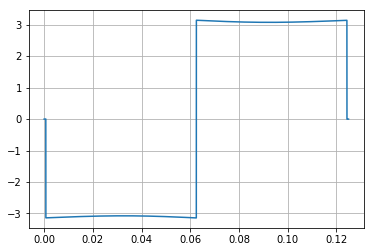

In [10]:
plt.plot(x[:N], phase)
plt.grid()

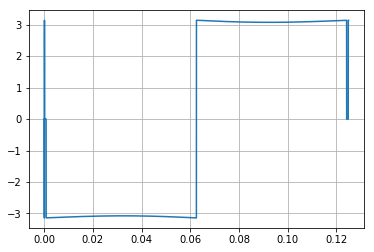

In [11]:
plt.plot(x[:N], phase_new)
plt.grid()

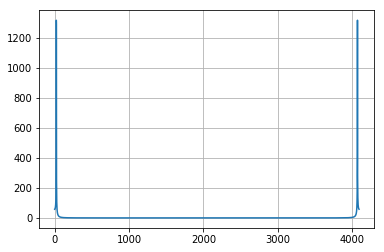

In [12]:
plt.plot(range(0, 4096), mag)
plt.grid()

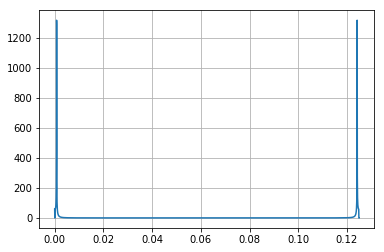

In [13]:
plt.plot(x[:N], mag_new)
plt.grid()

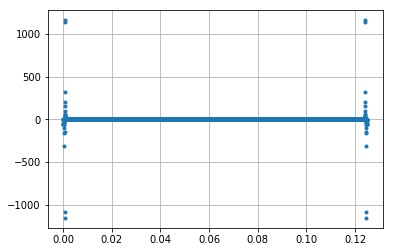

In [14]:
plt.plot(x[:N], mag_new - mag, '.')
plt.grid()

/home/holtrob/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


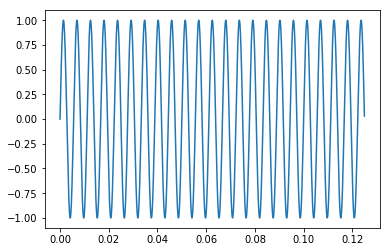

In [15]:
plt.plot(x[:N], np.fft.ifft(sp))

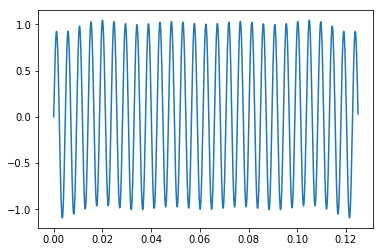

In [16]:
plt.plot(x[:N], np.fft.ifft(sp_new))

In [17]:
import struct

In [18]:
with open("bram_sine_init.coe", "w") as f:
    f.write(f"memory_initialization_radix=16;\n")
    f.write(f"memory_initialization_vector=\n")
    for val in yt[:N]:
        val = int(val * (10**4))
        res = struct.pack("<h", val)
        print(val)
        print(f"{hex(res[1])[2:].zfill(2)}{hex(res[0])[2:].zfill(2)}")
        f.write(f"{hex(res[1])[2:].zfill(2)}{hex(res[0])[2:].zfill(2)}\n")

0
0000
345
0159
689
02b1
1033
0409
1376
0560
1717
06b5
2056
0808
2392
0958
2726
0aa6
3056
0bf0
3383
0d37
3706
0e7a
4024
0fb8
4337
10f1
4646
1226
4949
1355
5246
147e
5536
15a0
5820
16bc
6097
17d1
6367
18df
6630
19e6
6884
1ae4
7130
1bda
7368
1cc8
7597
1dad
7817
1e89
8027
1f5b
8228
2024
8419
20e3
8601
2199
8771
2243
8932
22e4
9082
237a
9221
2405
9349
2485
9466
24fa
9571
2563
9665
25c1
9748
2614
9819
265b
9879
2697
9926
26c6
9962
26ea
9986
2702
9998
270e
9998
270e
9986
2702
9963
26eb
9927
26c7
9880
2698
9820
265c
9750
2616
9667
25c3
9573
2565
9468
24fc
9351
2487
9223
2407
9085
237d
8935
22e7
8775
2247
8604
219c
8423
20e7
8232
2028
8031
1f5f
7821
1e8d
7601
1db1
7372
1ccc
7135
1bdf
6889
1ae9
6635
19eb
6372
18e4
6103
17d7
5826
16c2
5542
15a6
5251
1483
4954
135a
4652
122c
4344
10f8
4030
0fbe
3712
0e80
3389
0d3d
3063
0bf7
2732
0aac
2399
095f
2062
080e
1723
06bb
1382
0566
1040
0410
696
02b8
351
015f
6
0006
-338
feae
-683
fd55
-1026
fbfe
-1369
faa7
-1710
f952
-2049
f7ff
-2386
f6ae
-2719
f561
-305

-4259
ef5d
-4568
ee28
-4873
ecf7
-5171
ebcd
-5463
eaa9
-5749
e98b
-6028
e874
-6300
e764
-6564
e65c
-6820
e55c
-7069
e463
-7309
e373
-7540
e28c
-7762
e1ae
-7975
e0d9
-8178
e00e
-8372
df4c
-8556
de94
-8729
dde7
-8892
dd44
-9045
dcab
-9187
dc1d
-9317
db9b
-9437
db23
-9546
dab6
-9643
da55
-9728
da00
-9802
d9b6
-9865
d977
-9915
d945
-9954
d91e
-9981
d903
-9996
d8f4
-9999
d8f1
-9990
d8fa
-9970
d90e
-9937
d92f
-9893
d95b
-9837
d993
-9769
d9d7
-9689
da27
-9598
da82
-9496
dae8
-9382
db5a
-9257
dbd7
-9121
dc5f
-8974
dcf2
-8816
dd90
-8648
de38
-8470
deea
-8281
dfa7
-8083
e06d
-7875
e13d
-7658
e216
-7431
e2f9
-7196
e3e4
-6952
e4d8
-6700
e5d4
-6439
e6d9
-6172
e7e4
-5896
e8f8
-5614
ea12
-5325
eb33
-5030
ec5a
-4729
ed87
-4422
eeba
-4110
eff2
-3793
f12f
-3471
f271
-3146
f3b6
-2816
f500
-2483
f64d
-2148
f79c
-1809
f8ef
-1469
fa43
-1127
fb99
-783
fcf1
-438
fe4a
-93
ffa3
251
00fb
595
0253
940
03ac
1283
0503
1624
0658
1964
07ac
2301
08fd
2635
0a4b
2967
0b97
3294
0cde
3618
0e22
3938
0f62
4253
109d
4562
11d

e03c
-8328
df78
-8514
debe
-8690
de0e
-8855
dd69
-9010
dcce
-9155
dc3d
-9288
dbb8
-9410
db3e
-9521
dacf
-9621
da6b
-9709
da13
-9786
d9c6
-9851
d985
-9905
d94f
-9946
d926
-9976
d908
-9994
d8f6
-9999
d8f1
-9993
d8f7
-9976
d908
-9946
d926
-9904
d950
-9851
d985
-9786
d9c6
-9709
da13
-9620
da6c
-9520
dad0
-9409
db3f
-9287
dbb9
-9153
dc3f
-9009
dccf
-8854
dd6a
-8688
de10
-8512
dec0
-8326
df7a
-8130
e03e
-7924
e10c
-7709
e1e3
-7485
e2c3
-7251
e3ad
-7009
e49f
-6759
e599
-6501
e69b
-6235
e7a5
-5961
e8b7
-5681
e9cf
-5393
eaef
-5099
ec15
-4800
ed40
-4494
ee72
-4183
efa9
-3867
f0e5
-3547
f225
-3222
f36a
-2893
f4b3
-2561
f5ff
-2226
f74e
-1888
f8a0
-1548
f9f4
-1207
fb49
-863
fca1
-519
fdf9
-174
ff52
170
00aa
515
0203
859
035b
1203
04b3
1545
0609
1885
075d
2222
08ae
2558
09fe
2890
0b4a
3218
0c92
3543
0dd7
3864
0f18
4180
1054
4491
118b
4796
12bc
5096
13e8
5390
150e
5678
162e
5958
1746
6232
1858
6498
1962
6756
1a64
7007
1b5f
7249
1c51
7482
1d3a
7707
1e1b
7922
1ef2
8128
1fc0
8324
2084
8510
213e
8686
21e

f9a4
-1286
fafa
-943
fc51
-599
fda9
-255
ff01
90
005a
435
01b3
779
030b
1123
0463
1465
05b9
1805
070d
2144
0860
2480
09b0
2812
0afc
3142
0c46
3468
0d8c
3789
0ecd
4106
100a
4418
1142
4725
1275
5027
13a3
5322
14ca
5611
15eb
5893
1705
6169
1819
6437
1925
6697
1a29
6949
1b25
7193
1c19
7428
1d04
7655
1de7
7873
1ec1
8081
1f91
8279
2057
8468
2114
8646
21c6
8814
226e
8972
230c
9119
239f
9255
2427
9380
24a4
9494
2516
9597
257d
9688
25d8
9768
2628
9836
266c
9892
26a4
9937
26d1
9969
26f1
9990
2706
9999
270f
9996
270c
9981
26fd
9954
26e2
9916
26bc
9865
2689
9803
264b
9729
2601
9644
25ac
9547
254b
9438
24de
9319
2467
9188
23e4
9046
2356
8894
22be
8731
221b
8558
216e
8374
20b6
8180
1ff4
7977
1f29
7764
1e54
7542
1d76
7311
1c8f
7071
1b9f
6823
1aa7
6567
19a7
6303
189f
6031
178f
5752
1678
5467
155b
5174
1436
4876
130c
4572
11dc
4262
10a6
3947
0f6b
3628
0e2c
3304
0ce8
2977
0ba1
2645
0a55
2311
0907
1974
07b6
1634
0662
1293
050d
950
03b6
606
025e
261
0105
-83
ffad
-428
fe54
-772
fcfc
-1116
fba4
-1458
fa4e


In [191]:
N = 20

In [56]:
zerostest = np.zeros(N)
source = np.linspace(1, N, N)
zerostest[0] = source[0]
zerostest[1:(N//2) + 1] = source[1:(N//2) + 1]
zerostest[(N//2) + 1:] = source[(N//2)-1:0:-1]
zerostest

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 10.,  9.,
        8.,  7.,  6.,  5.,  4.,  3.,  2.])

In [57]:
source

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])